In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily
import sklearn.cluster
import numpy as np

def make_geo(df_accidents: pd.DataFrame, df_locations: pd.DataFrame) -> geopandas.GeoDataFrame:

    # accidentsGeo = geopandas.GeoDataFrame(df_accidents, geometry=geopandas.points_from_xy(df_accidents.longitude, df_accidents.latitude), crs='EPSG:5514')
    newDf = pd.concat([df_accidents, df_locations], ignore_index=True)
    filteredDf = newDf[newDf['d'].notna() & newDf['e'].notna()]
    checkedDf = filteredDf.copy()
    checkedDf[['d', 'e']] = checkedDf[['d', 'e']].where(checkedDf['d'] >= checkedDf['e'], checkedDf[['e', 'd']].values)
    geoDf = geopandas.GeoDataFrame(filteredDf, geometry=geopandas.points_from_xy(checkedDf.d, checkedDf.e), crs='EPSG:5514')

    print(geoDf.geometry)

    geoDf = geoDf.to_crs("EPSG:4326")

    # Find the index of the maximum longitude (x) and latitude (y)
    max_x_idx = geoDf.geometry.x.idxmax()  # Maximum longitude
    max_y_idx = geoDf.geometry.y.idxmax()  # Maximum latitude

    # Retrieve the points with the maximum longitude and latitude values
    max_x_point = geoDf.loc[max_x_idx]
    max_y_point = geoDf.loc[max_y_idx]

    # Print the GPS coordinates (latitude and longitude) of the points
    print(f"Point with highest longitude (x): ({max_x_point.geometry.x}, {max_x_point.geometry.y})")
    print(f"Point with highest latitude (y): ({max_y_point.geometry.x}, {max_y_point.geometry.y})")


    world = geopandas.read_file('ne_110m_admin_0_countries.shp')

    czechia = world[world['ADMIN'] == 'Czechia']

    # Plot Czechia map
    ax = czechia.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))

    # Ensure CRS matches
    geoDf = geoDf.to_crs("EPSG:4326")

    # Plot the points on the map
    geoDf.plot(ax=ax, color='red', markersize=3)

    # Add titles and labels
    plt.title("Points on Czechia Map")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Show the map
    plt.savefig('map.png')

    return geoDf

164646    POINT (-715794 -1017664)
164647    POINT (-1132534 -691598)
164648    POINT (-1107780 -693884)
164649    POINT (-1104484 -701671)
164650    POINT (-1113553 -694154)
                    ...           
329287    POINT (-1139158 -535163)
329288    POINT (-1120527 -547595)
329289    POINT (-1123234 -547894)
329290    POINT (-1127033 -540835)
329291    POINT (-1042339 -752631)
Name: geometry, Length: 164646, dtype: geometry
Point with highest longitude (x): (24.830159632382628, 59.75589624975722)
Point with highest latitude (y): (24.830159632382628, 59.75589624975722)


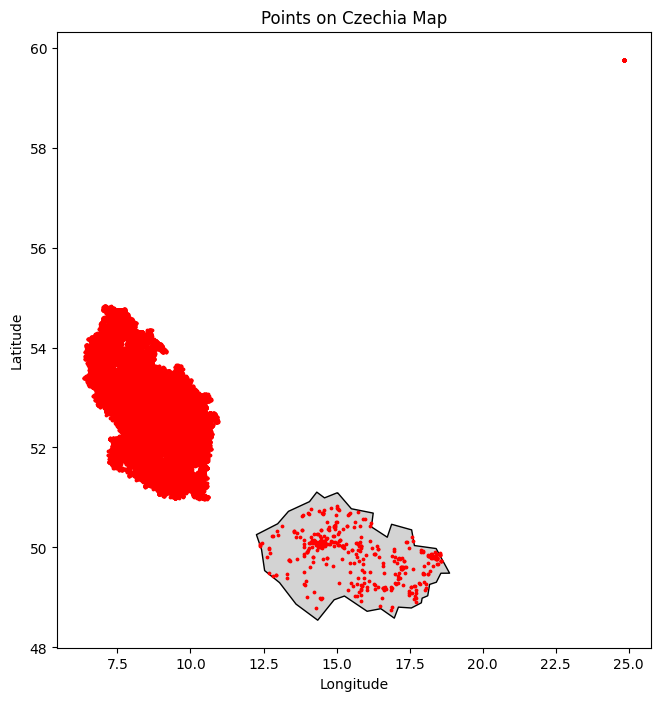

In [101]:
df_accidents = pd.read_pickle("accidents.pkl.gz")
df_locations = pd.read_pickle("locations.pkl.gz")
gdf = make_geo(df_accidents, df_locations)